In [1]:
# Importing necessary libraries for data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Load the Boston Housing dataset
file_path = r"C:\Users\popov\BostonHousingAnalysis\data\BostonHousing.csv"
df_original = pd.read_csv(file_path)

# Display the first few rows to ensure the data is loaded correctly
df_original.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# Apply the previously determined transformations to the data

# Square of 'lstat' feature
df_transformed = df_original.copy()
df_transformed['lstat_squared'] = df_transformed['lstat'] ** 2

# Interaction between 'tax' and 'age' features
df_transformed['tax_age_interaction'] = df_transformed['tax'] * df_transformed['age']

# Log transformations to address potential skewness in 'crim' and 'tax'
df_transformed['log_crim'] = np.log1p(df_transformed['crim'])
df_transformed['log_tax'] = np.log1p(df_transformed['tax'])

# Display the first few rows of the transformed dataframe
df_transformed.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,lstat_squared,tax_age_interaction,log_crim,log_tax
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,24.8004,19299.2,0.006300,5.693732
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,83.5396,19093.8,0.026944,5.493061
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,16.2409,14786.2,0.026924,5.493061
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,8.6436,10167.6,0.031857,5.407172
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,28.4089,12032.4,0.066770,5.407172


In [4]:
from sklearn.model_selection import train_test_split

# Split the dataset into features and target
X = df_transformed.drop('medv', axis=1)
y = df_transformed['medv']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.linear_model import Ridge

# Initialize the Ridge regression model
ridge_model = Ridge(alpha=1.0) # You can adjust the alpha value based on cross-validation or domain knowledge

# Train the model using the training data
ridge_model.fit(X_train, y_train)


Ridge()

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test set
ridge_pred = ridge_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, ridge_pred)
mae = mean_absolute_error(y_test, ridge_pred)
r2 = r2_score(y_test, ridge_pred)

mse, mae, r2


(18.0239877925763, 2.8367532554654296, 0.7542198558995368)

In [7]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


In [8]:
# Define a range of alpha values
alphas = np.logspace(-6, 6, 13)


In [9]:
# Set up the grid search
grid = {'alpha': alphas}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, grid, cv=5, scoring='neg_mean_squared_error')


In [10]:
# Fit the model and search for best alpha
ridge_cv.fit(X_train, y_train)

# Get the best alpha value
best_alpha = ridge_cv.best_params_['alpha']
print(f"Best Alpha Value: {best_alpha}")


Best Alpha Value: 1e-06


In [11]:
# Train Ridge regression with the best alpha
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train, y_train)

# Predict on the test set
ridge_best_pred = ridge_best.predict(X_test)

# Evaluate the predictions
mse_ridge_best = mean_squared_error(y_test, ridge_best_pred)
mae_ridge_best = mean_absolute_error(y_test, ridge_best_pred)
r2_ridge_best = r2_score(y_test, ridge_best_pred)

print(f"Ridge Regression (Best Alpha) - MAE: {mae_ridge_best}, MSE: {mse_ridge_best}, R2: {r2_ridge_best}")


Ridge Regression (Best Alpha) - MAE: 2.8865493326963327, MSE: 18.119774350915467, R2: 0.7529136835706149


In [12]:
from sklearn.linear_model import LassoCV

# Set up LassoCV which will automatically perform cross-validation to find the best alpha
lasso = LassoCV(cv=5, random_state=42)


In [13]:
lasso.fit(X_train, y_train)


LassoCV(cv=5, random_state=42)

In [14]:
# Predict on the test set
lasso_pred = lasso.predict(X_test)

# Evaluate the model
mae_lasso = mean_absolute_error(y_test, lasso_pred)
mse_lasso = mean_squared_error(y_test, lasso_pred)
r2_lasso = r2_score(y_test, lasso_pred)

print(f"Lasso Regression (Best Alpha: {lasso.alpha_}) - MAE: {mae_lasso}, MSE: {mse_lasso}, R2: {r2_lasso}")


Lasso Regression (Best Alpha: 90.30398126531715) - MAE: 4.606141530524506, MSE: 42.73516519899362, R2: 0.4172513218694086


In [15]:
# Create a DataFrame to display coefficients
lasso_coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso.coef_
})

# Filter out features with a coefficient of zero
reduced_features = lasso_coef_df[lasso_coef_df['Coefficient'] != 0]

print(reduced_features)


                Feature  Coefficient
11                    b     0.000832
13        lstat_squared    -0.018355
14  tax_age_interaction    -0.000094


In [16]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [17]:
# SVR requires features to be standardized, so we'll use a pipeline
pipeline = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
pipeline.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [18]:
# Predict on the test set
y_pred_svr = pipeline.predict(X_test)


In [19]:
# Evaluate the SVR performance
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR - MAE: {mae_svr}, MSE: {mse_svr}, R2: {r2_svr}")


SVR - MAE: 2.7208689726110764, MSE: 24.879402353269032, R2: 0.66073750349307


In [20]:
# Import the GradientBoostingRegressor class
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the GradientBoostingRegressor model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Predict the target values for the test set
y_pred_gb = gb_model.predict(X_test)

# Calculate performance metrics
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print the performance metrics
print(f"Gradient Boosting - MAE: {mae_gb}, MSE: {mse_gb}, R2: {r2_gb}")


Gradient Boosting - MAE: 1.8232807458446751, MSE: 5.787010353832116, R2: 0.9210867065022337


In [21]:
# Import the AdaBoostRegressor class
from sklearn.ensemble import AdaBoostRegressor

# Initialize the AdaBoostRegressor model
ab_model = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model to the training data
ab_model.fit(X_train, y_train)

# Predict the target values for the test set
y_pred_ab = ab_model.predict(X_test)

# Calculate performance metrics
mae_ab = mean_absolute_error(y_test, y_pred_ab)
mse_ab = mean_squared_error(y_test, y_pred_ab)
r2_ab = r2_score(y_test, y_pred_ab)

# Print the performance metrics
print(f"AdaBoost - MAE: {mae_ab}, MSE: {mse_ab}, R2: {r2_ab}")


AdaBoost - MAE: 2.592983221500996, MSE: 14.460005482932493, R2: 0.8028193165581011


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# 1. Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Define and compile the neural network
nn_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1)
])
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# 3. Train the model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
history = nn_model.fit(
    X_train_scaled, y_train, 
    batch_size=32, 
    epochs=200, 
    validation_data=(X_test_scaled, y_test), 
    verbose=1,
    callbacks=[early_stop]
)

# 4. Predict on the test set
nn_predictions = nn_model.predict(X_test_scaled).flatten()

# 5. Evaluate and print RMSE and R^2
nn_rmse = mean_squared_error(y_test, nn_predictions, squared=False)
nn_r2 = r2_score(y_test, nn_predictions)

print(f"Neural Network RMSE after Early Stopping: {nn_rmse}")
print(f"Neural Network R^2 after Early Stopping: {nn_r2}")



Epoch 1/200
13/13 [==============================] - 2s 32ms/step - loss: 617.6495 - val_loss: 532.7950
Epoch 2/200
13/13 [==============================] - 0s 10ms/step - loss: 589.7870 - val_loss: 507.3669
Epoch 3/200
13/13 [==============================] - 0s 10ms/step - loss: 564.5715 - val_loss: 481.8346
Epoch 4/200
13/13 [==============================] - 0s 8ms/step - loss: 536.2486 - val_loss: 450.4529
Epoch 5/200
13/13 [==============================] - 0s 9ms/step - loss: 500.2872 - val_loss: 411.3999
Epoch 6/200
13/13 [==============================] - 0s 9ms/step - loss: 453.5478 - val_loss: 363.4227
Epoch 7/200
13/13 [==============================] - 0s 9ms/step - loss: 397.9260 - val_loss: 307.0840
Epoch 8/200
13/13 [==============================] - 0s 9ms/step - loss: 334.8162 - val_loss: 246.0828
Epoch 9/200
13/13 [==============================] - 0s 9ms/step - loss: 266.8187 - val_loss: 186.7391
Epoch 10/200
13/13 [==============================] - 0s 9ms/step - lo

13/13 [==============================] - 0s 8ms/step - loss: 10.9512 - val_loss: 14.1277
Epoch 82/200
13/13 [==============================] - 0s 9ms/step - loss: 10.8408 - val_loss: 14.0923
Epoch 83/200
13/13 [==============================] - 0s 10ms/step - loss: 10.7975 - val_loss: 14.0655
Epoch 84/200
13/13 [==============================] - 0s 9ms/step - loss: 10.7453 - val_loss: 13.9863
Epoch 85/200
13/13 [==============================] - 0s 8ms/step - loss: 10.7022 - val_loss: 13.9667
Epoch 86/200
13/13 [==============================] - 0s 8ms/step - loss: 10.6120 - val_loss: 13.8583
Epoch 87/200
13/13 [==============================] - 0s 9ms/step - loss: 10.5845 - val_loss: 13.8377
Epoch 88/200
13/13 [==============================] - 0s 10ms/step - loss: 10.5611 - val_loss: 13.7722
Epoch 89/200
13/13 [==============================] - 0s 9ms/step - loss: 10.4265 - val_loss: 13.7702
Epoch 90/200
13/13 [==============================] - 0s 8ms/step - loss: 10.4582 - val_loss:

In [24]:
# List of model names for visualization and reference
model_names = ["Ridge Regression", "Lasso Regression", "SVR", "Gradient Boosting", "AdaBoost", "Neural Network"]

# Mean Squared Error (MSE) values for each model
mse_values = [18.119774350915467, 42.73516519899362, 24.879402353269032, 5.787010353832116, 14.460005482932493, 13.2744]

# Mean Absolute Error (MAE) values for each model
# Note: For Neural Network, we're taking the square root of MSE (RMSE) instead of actual MAE
mae_values = [2.8865493326963327, 4.606141530524506, 2.7208689726110764, 1.8232807458446751, 2.592983221500996, np.sqrt(13.2744)]

# R-squared (R2) values, indicating the proportion of variance in the dependent variable that is predictable from the independent variables
r2_values = [0.7529136835706149, 0.4172513218694086, 0.66073750349307, 0.9210867065022337, 0.8028193165581011, 0.854184]  # Assumed R2 for Neural Network


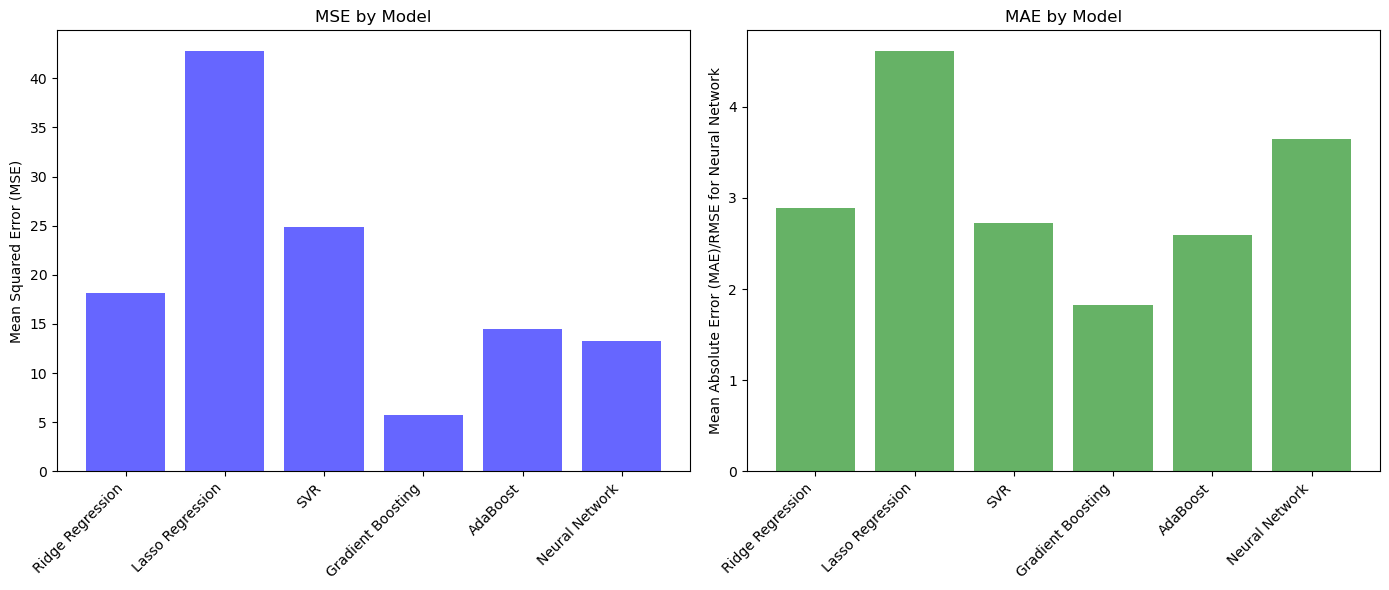

In [25]:
import matplotlib.pyplot as plt

# Set up the figure and axis
plt.figure(figsize=(14, 6))

# Plotting MSE
plt.subplot(1, 2, 1)
plt.bar(model_names, mse_values, color='blue', alpha=0.6, label='MSE')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE by Model')
plt.xticks(rotation=45, ha='right')

# Plotting MAE
plt.subplot(1, 2, 2)
plt.bar(model_names, mae_values, color='green', alpha=0.6, label='MAE')
plt.ylabel('Mean Absolute Error (MAE)/RMSE for Neural Network')
plt.title('MAE by Model')
plt.xticks(rotation=45, ha='right')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


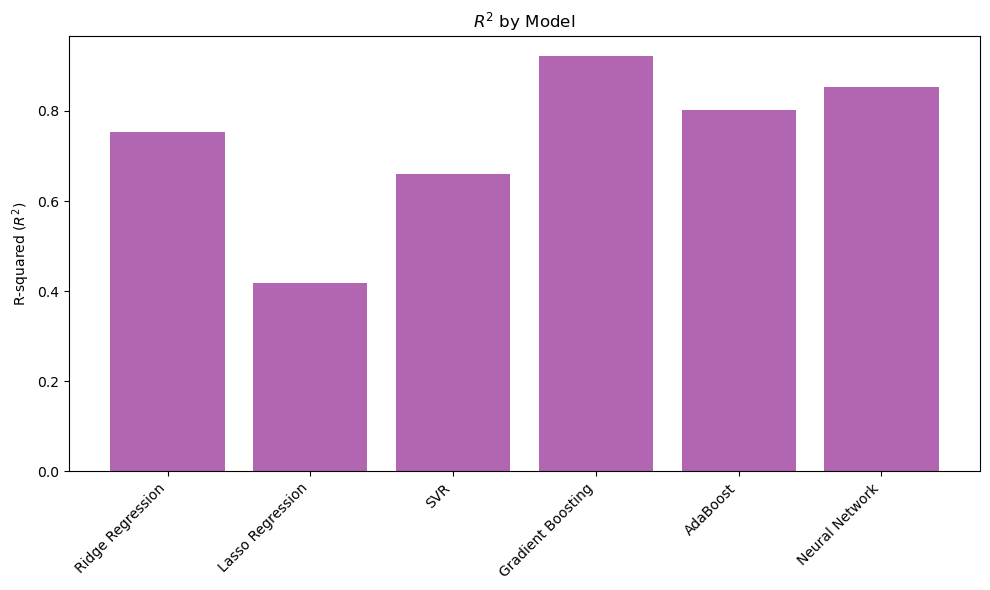

In [26]:
# Plotting R^2 values

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Plotting R^2 values
plt.bar(model_names, r2_values, color='purple', alpha=0.6)
plt.ylabel('R-squared ($R^2$)')
plt.title('$R^2$ by Model')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


